In [19]:
#Exercise 1
import scipy.linalg
import numpy as np
from numba import jit,vectorize,float64
import matplotlib.pyplot as plt

#load data from matrix_data.txt
x = np.loadtxt('matrix_data.txt')
x

array([[  5.64375001e-01,   1.69296089e-01,   6.68370874e-04,
          1.38986425e-08,   1.17082946e-15,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  4.63288290e-02,   5.64167366e-01,   1.55867820e-01,
          5.04151137e-04,   8.43728314e-09,   6.13966018e-16,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  5.05704583e-05,   5.82757782e-02,   6.01626205e-01,
          1.42471751e-01,   3.77063900e-04,   5.07691059e-09,
          3.21954892e-16,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  3.96888916e-10,   7.76222176e-05,   7.27953504e-02,
          6.38004747e-01,   1.29278334e-01,   2.79621278e-04,
          3.02802912e-09,   1.12552323e-16,   0.00000000e+00,
          0.00000000e+00],
       [  1.90685706e-17,   7.51615550e-10,   1.18125429e-04,
          9.02416558e-02,   6.72837429e-01,   1.16442325e-01,
          2.05597177e-04

In [2]:
#compute the spectral radius of x
[eig_value,eig_vector] = scipy.linalg.eig(x)
λ = np.max(np.abs(eig_value))
λ

1.0044277694480632

In [3]:
#compute the left hand side of the local spectral radius theorem
@jit
def gen_seq(x,i,v):
    seq = np.zeros(i)
    for ii in range(1,i):
        seq[ii] = (np.linalg.norm((np.mat(x))**ii*v))**(1/ii)
    #seq = (np.linalg.norm((np.mat(x))**np.arange(1,i)*v))**(1/np.arange(1,i))
    return seq

In [4]:
#generate a random N*1 vector
N = np.shape(x)[0]
v = np.abs(np.random.randn(N,1))

%time seq = gen_seq(x,80000,v)
seq

Wall time: 11.6 s


array([ 0.        ,  2.3828614 ,  1.4444213 , ...,  1.00443472,
        1.00443472,  1.00443472])

In [25]:
#Exercise 2
def ts_hists(g,x0,ts_length,bins=100,num_plots=100):
    def ts_hist(g,x0,ts_length,bins=100):
        x_vec = np.zeros(ts_length)
        x_vec[0] = x0
        for i in range(ts_length-1):
            x_vec[i+1] = g(x_vec[i])
        plt.hist(x_vec,bins=bins)
        plt.show()
    
    for i in range(num_plots):
        ts_hist(g,x0[i],ts_length)
    

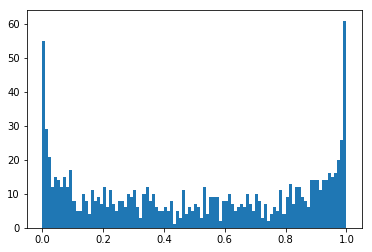

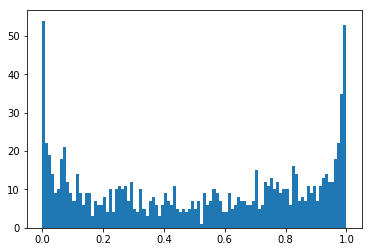

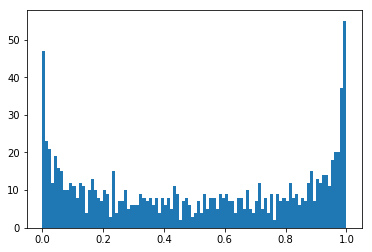

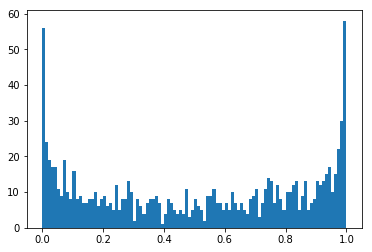

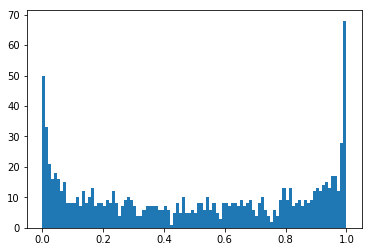

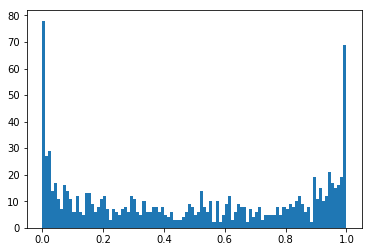

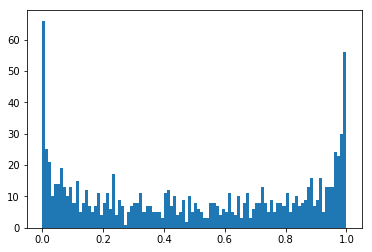

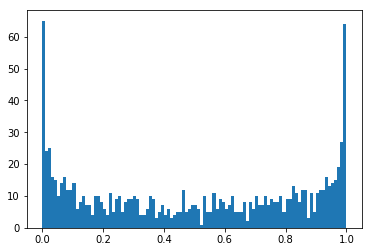

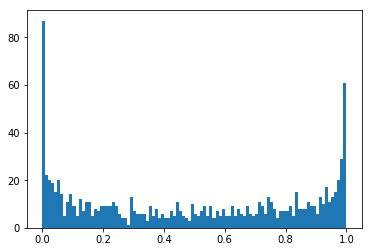

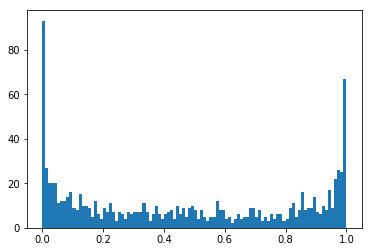

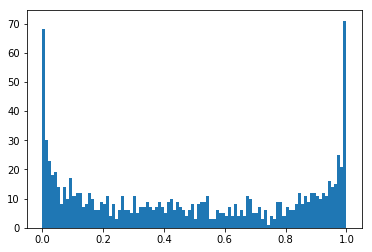

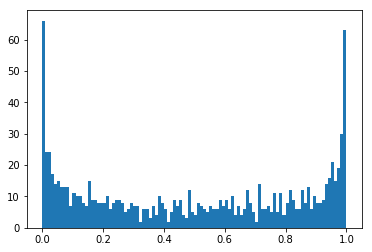

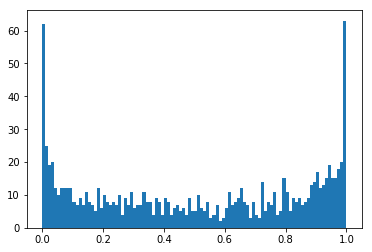

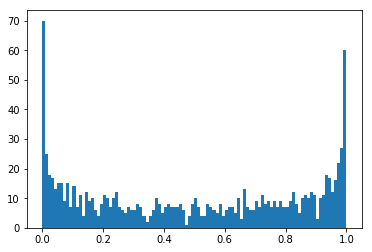

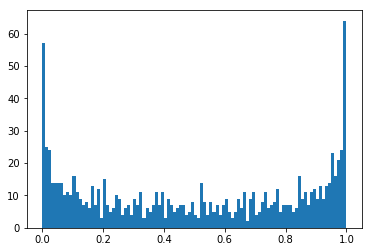

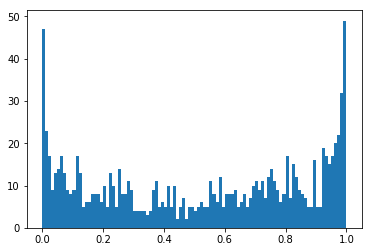

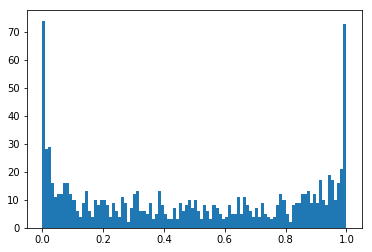

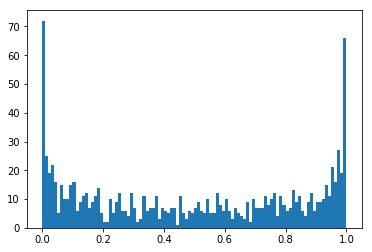

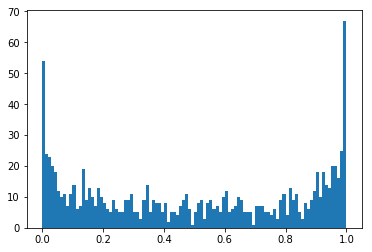

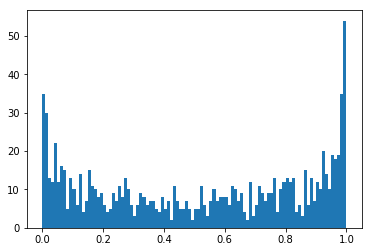

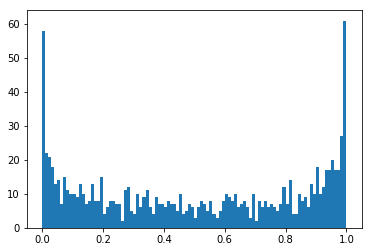

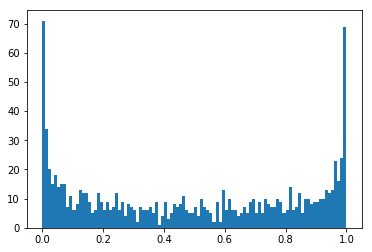

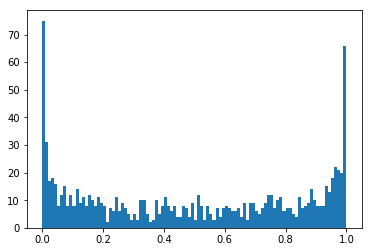

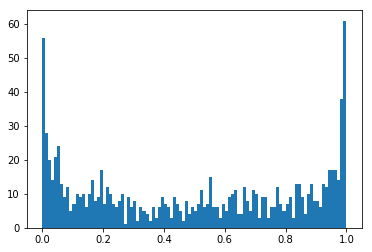

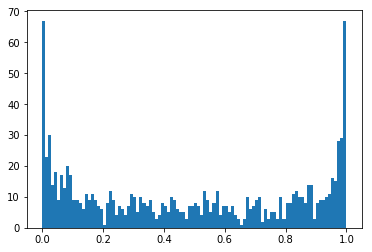

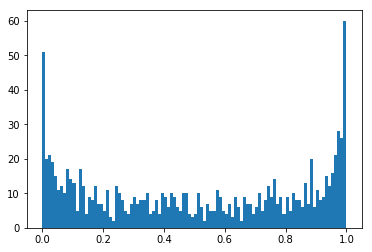

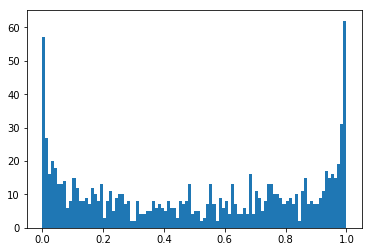

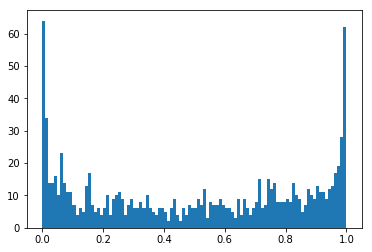

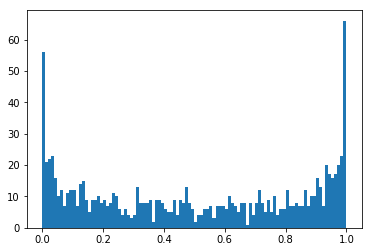

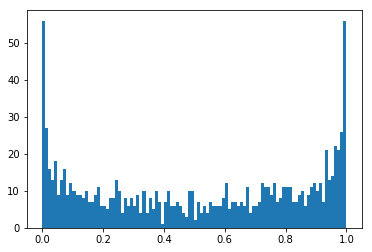

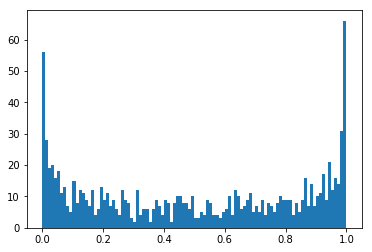

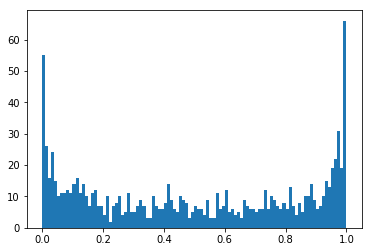

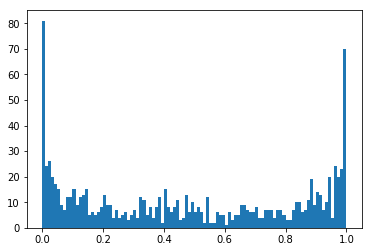

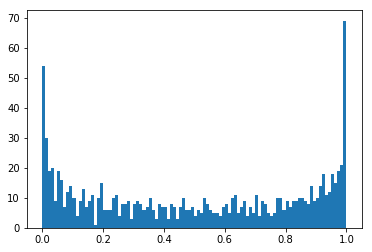

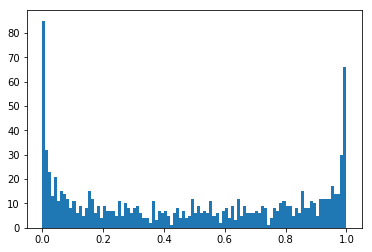

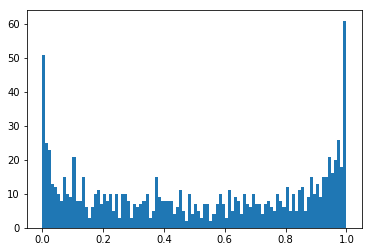

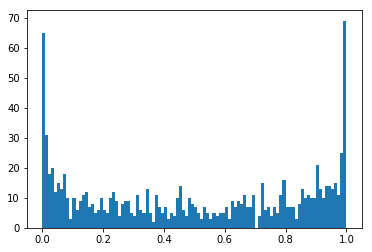

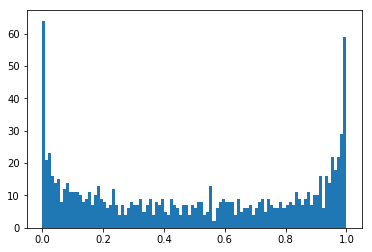

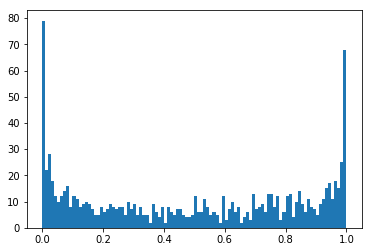

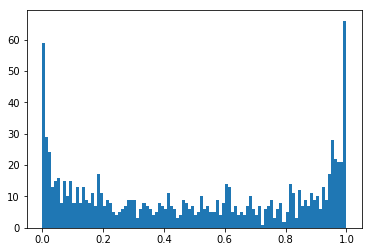

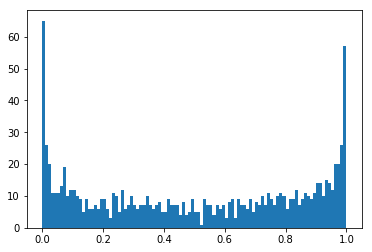

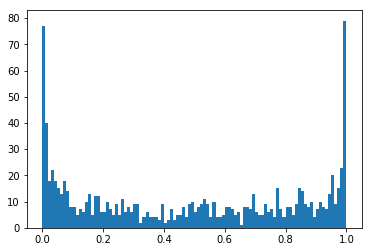

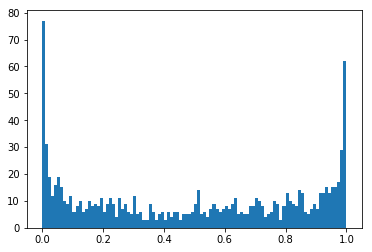

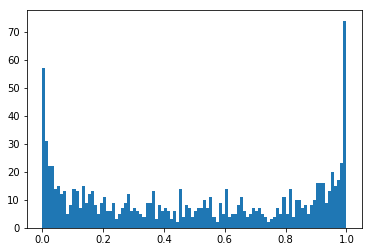

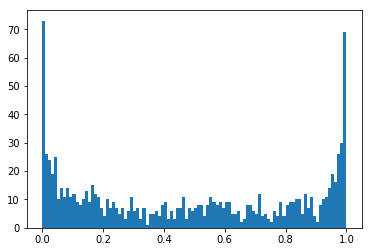

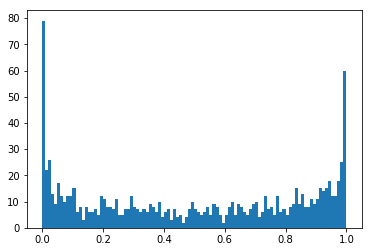

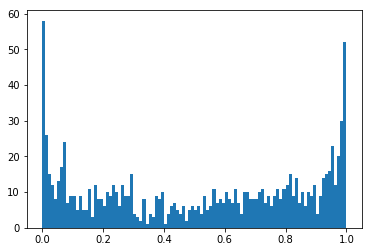

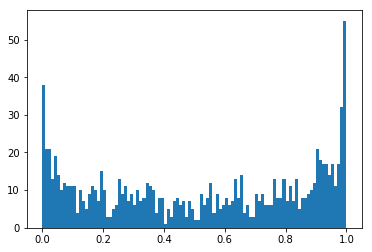

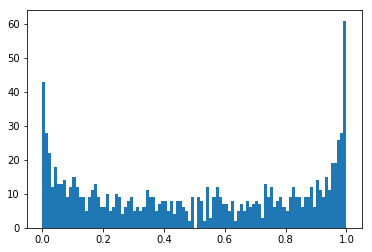

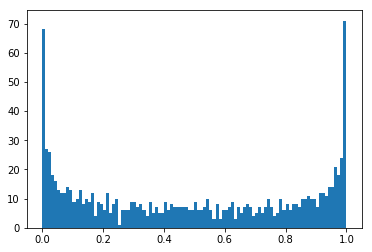

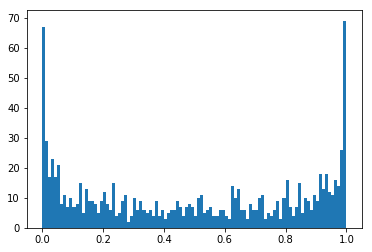

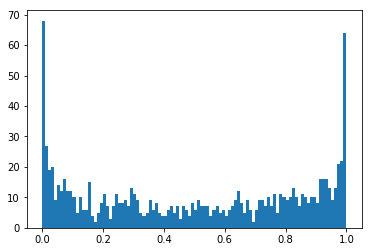

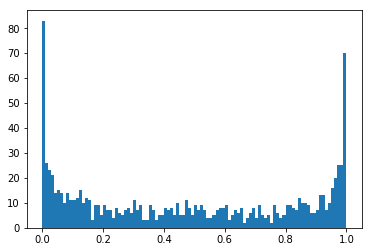

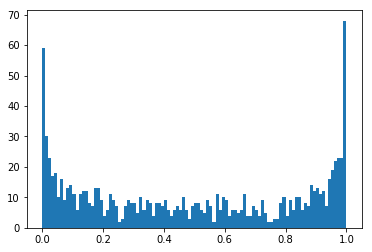

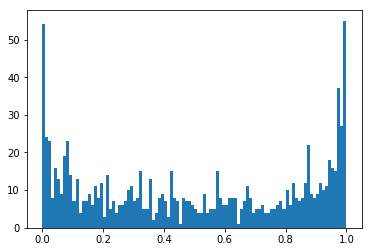

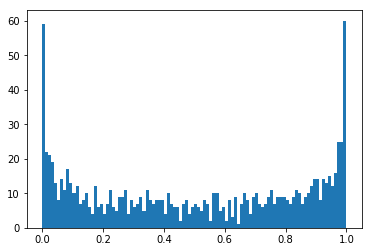

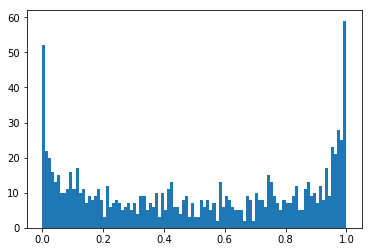

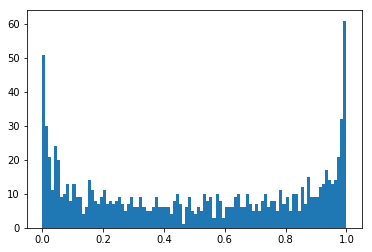

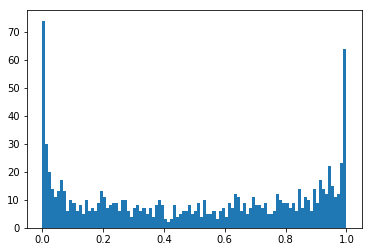

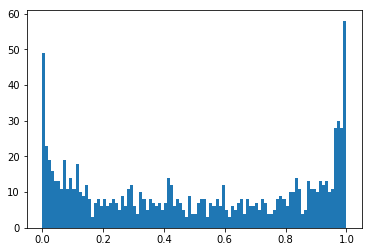

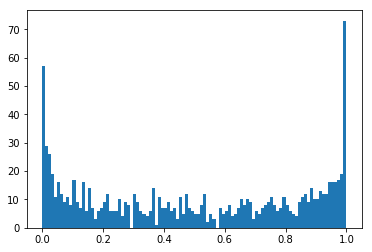

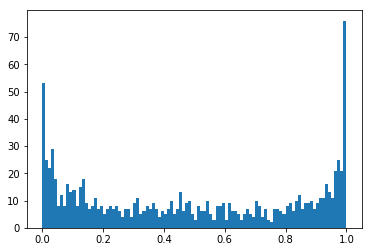

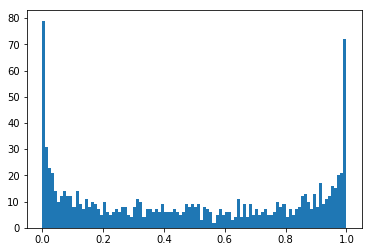

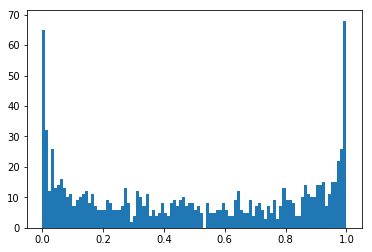

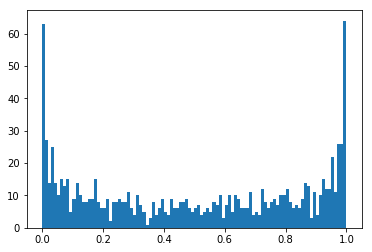

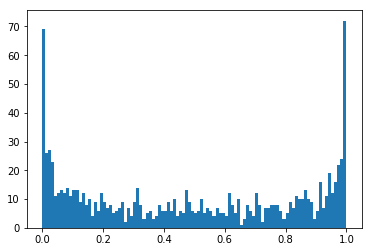

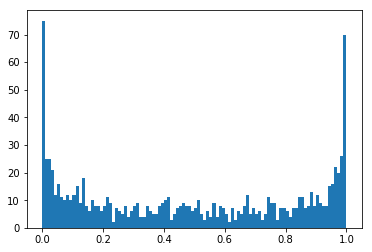

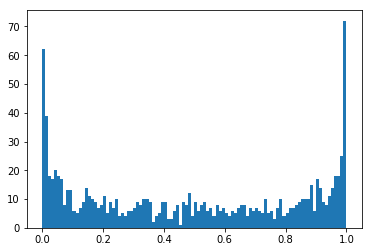

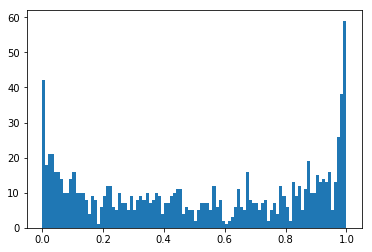

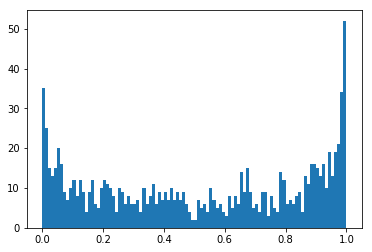

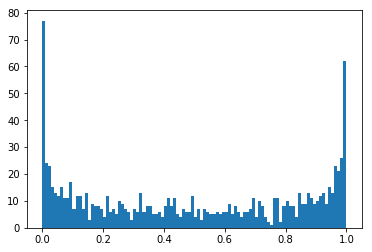

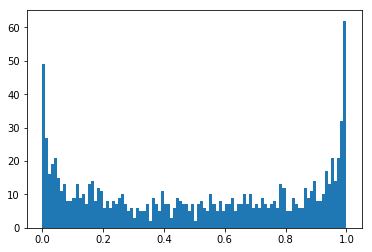

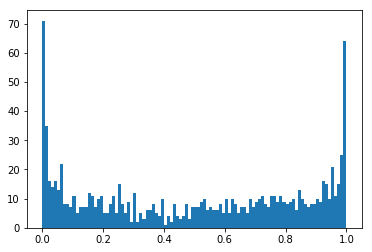

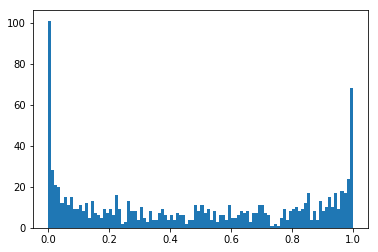

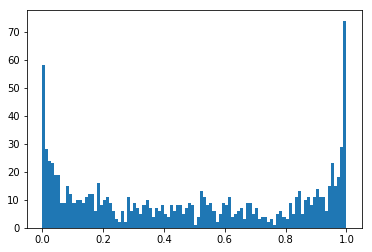

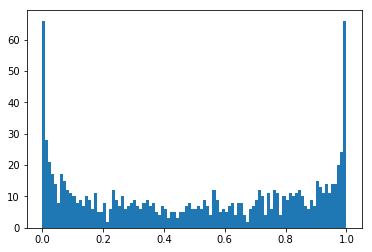

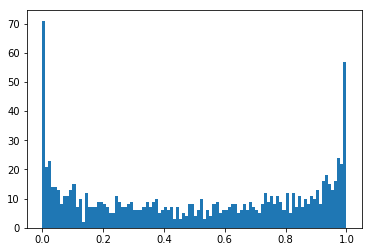

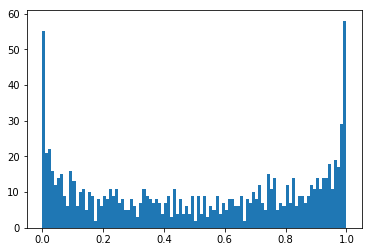

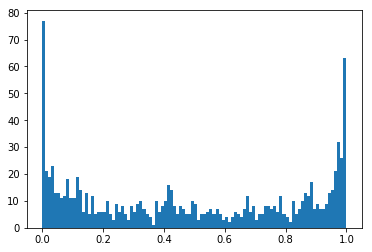

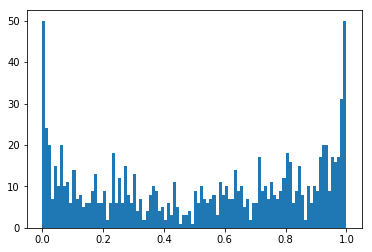

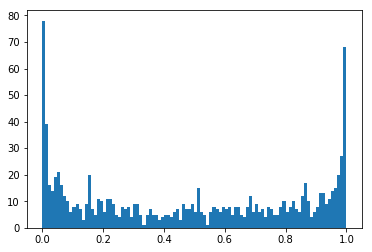

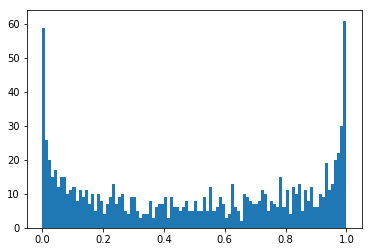

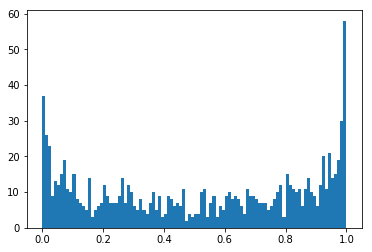

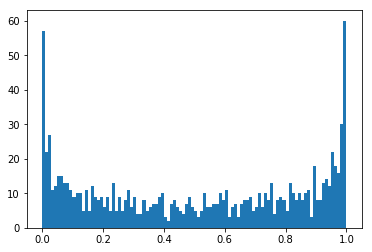

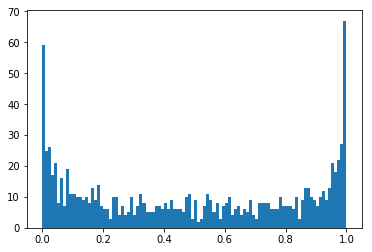

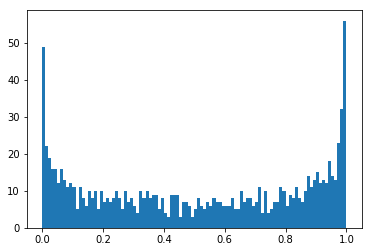

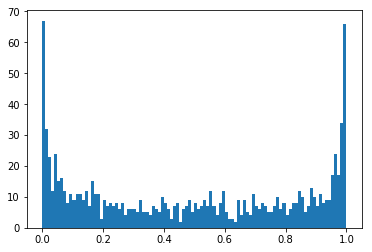

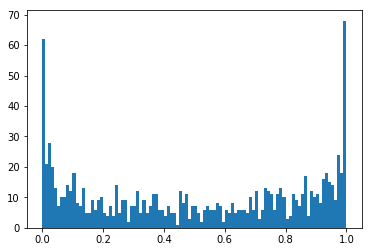

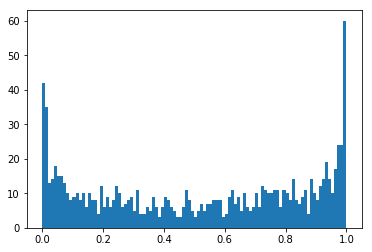

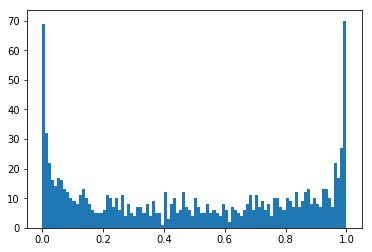

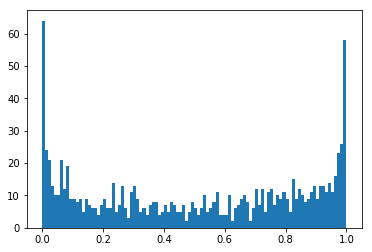

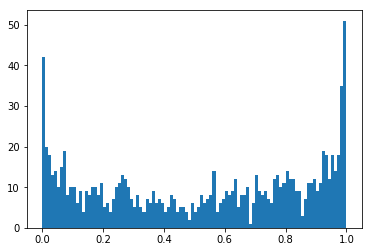

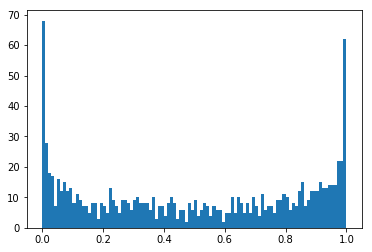

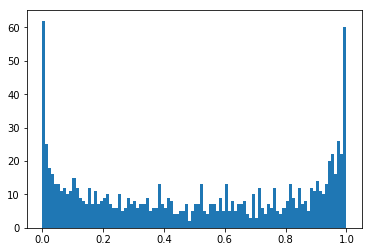

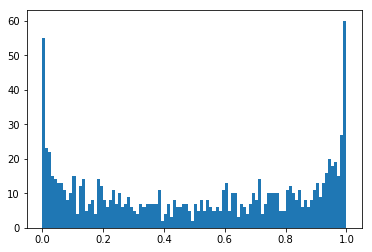

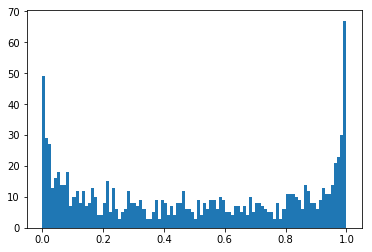

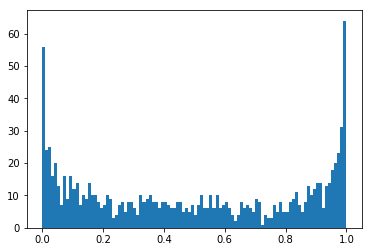

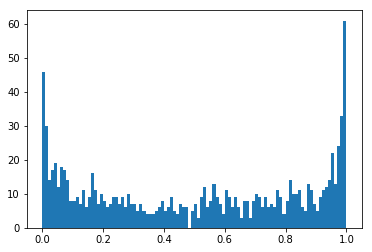

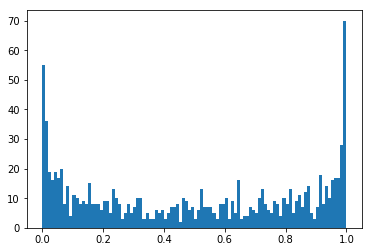

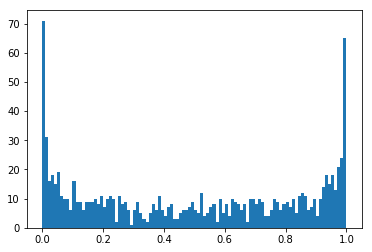

In [26]:
g = lambda x: 4*x*(1-x)
x0 = np.random.uniform(0,1,size=100)
x0.sort()
ts_length=1000
#for i in range(100):
#    ts_hist(g,x0[i],ts_length)
ts_hists(g,x0,ts_length)